# Projet d'étude Tests d'hypothèse
*Rédaction Rémi de Guiran. D'après une idée de Florian Dadouchi*

Pour les 3 journées de cours consacrées à cette partie, nous allons nous intéresser à la détection d'un signal sonore. Cela nous amènera en première itération à réaliser une étude sur le bruit de fond. Puis nous nous intéresserons à la détection d'un signal sonore présent au milieu du bruit de fond. Pour réaliser une détection, nous allons devoir faire une hypothèse qui nous permettra de décider si oui ou non, un signal sonore est détecté. 

Vous aborderez les notions suivantes :
* Fonctions de distribution en statistique (continues et discrètes)
* Elements de probabilités
* Tests d'hypothèses (choix d'une hypothèse nulle, d'une hypothèse alternative, critère de significativité et p-value)

Si cela remonte à loin, vous aurez besoin de vous raffraichir la mémoire sur certaines notions :
* Les bases du calcul différentiel et intégral (Qu'est ce qu'une dérivée ? Une intégrale ? etc). Vous n'aurez pas besoin de calculer des intégrales analytiquement mais il sera important de comprendre ces concepts pour avancer
* Les bases de probabilités.

**Sujet :** 
Depuis quelque temps, bien que vivant dans un endroit très calme la nuit, vous vous demandez si des sons ne vous dérangent pas pendant votre sommeil. Bien décidé à avoir le coeur net et plutôt que de vous demander à chaque reveil si celui-ci est dû à un son quelconque ou juste à une mauvaise qualité de sommeil, vous décidez de réaliser un enregistrement sonore la nuit, et de créer un test qui permettra de détecter les sons qui se seront produits durant cette nuit.

Tous les enregistrements sont disponibles avec le sujet, chacun en double :
* un au format ".wav" (ça serait dommage de ne pas utiliser vos oreilles alors que vous travaillez sur des signaux sonores)
* l'autre et en format .txt.

Chaque enregistrement est **échantillonné à 48 kHz**.

Pour éviter de perdre du temps, la variable "signal sonore" contenue dans chaque fichier .txt est déjà normalisée, pour avoir des amplitudes de signaux n'excédant pas quelques unités. Vous n'aurez donc pas besoin de modifier vos données pour travailler dessus.


**Information importante :**

Toutes les lois de probabilités porteront sur la valeur absolue de l’amplitude mesurée. De manière générale, par défaut toute référence à une amplitude renvoie à la valeur absolue de l’amplitude mesurée. Le cas contraire vous sera explicité. L’abréviation **va** renvoie à la valeur absolue, et **vr** à la valeur réelle.


**Resources :**


* Lois de probabilités :

Poly "Statistique Appliquée", chapitres 2.1 et 3.1

https://www.youtube.com/watch?v=YXLVjCKVP7U

https://statisticsbyjim.com/basics/probability-distributions/




* Tests d'hypothèses :

Poly "Statistique : Tests d'hypothèses", chapitre 1

https://www.youtube.com/watch?v=tTeMYuS87oU

https://towardsdatascience.com/everything-you-need-to-know-about-hypothesis-testing-part-i-4de9abebbc8a

# Iteration 1 - Etude du bruit et d'un son

# A Etude du bruit

Avant de commencer à réfléchir à un quelconque test de detection de son, vous décidez d'étudier le bruit de fond. Le bruit c'est en fait tout ce qui ne vous intéresse pas, une fluctuation très faiblement audible (écouter le fichier wav) et qui ne vous dérange pas pendant votre sommeil (vous vivez dans un endroit calme). Ce qui vous intéresse in fine, ce sont les sons (on distingue donc bien les notions de son et de bruit). Mais pour espérer les détecter des **sons**, il vous faut d'abord caractériser **le bruit**.

##  A.0 - Ecouter le fichier "bruit.wav" dans un lecteur audio

## A.1 - Importer le bruit "bruit_seul.txt" dans un array numpy

Vous pouvez utiliser la fonction loadtxt de numpy

In [39]:
import numpy as np


import matplotlib.pyplot as plt
#import os
#from os import listdir

In [40]:
## Load data from the file
file_name = 'bruit_seul.txt'
data = np.loadtxt(file_name)

## A.2 - Plotter l'amplitude mesurée (en vr) en fonction du temps pour la première seconde d'enregistrement

On rappelle que la fréquence d'échantillonnage est 48 kHz

In [41]:
#Sampling frequency 
sampling_frequency = 48000

#Recording duration
recording_duration = len(data) / sampling_frequency

# Create a time array in seconds
time = np.linspace(0, recording_duration, len(data))

In [42]:
len(data)

1000000

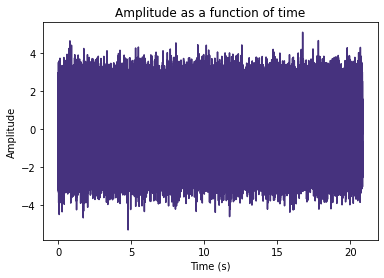

In [43]:
plt.plot(time, data)
plt.title("Amplitude as a function of time")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

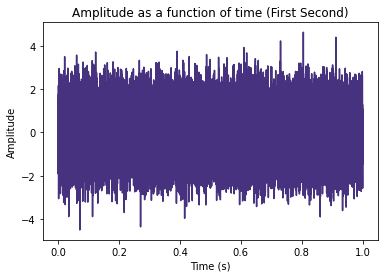

In [44]:
## for the first second of recording
# Duration of interest (in seconds)
duration_of_interest = 1

# Calculate the number of samples for the first second
num_samples_first_second = int(sampling_frequency * duration_of_interest)

# Slice the data to include only the first second
data_first_second = data[:num_samples_first_second]

# Create a time array for the first second
time_first_second = np.linspace(0, duration_of_interest, num_samples_first_second)

# Plot amplitude as a function of time for the first second
plt.plot(time_first_second, data_first_second)
plt.title("Amplitude as a function of time (First Second)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

## A.3 - Afficher les probability density function (PDF) et  la cumulative distribution function (CDF) empiriques de l'amplitude du bruit en va

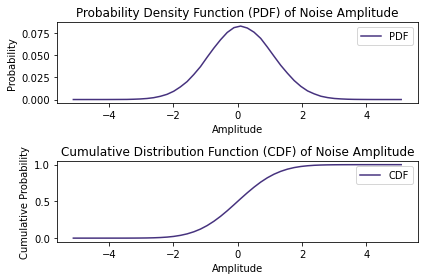

In [45]:

# Calculate PDF
hist, bin_edges = np.histogram(data, bins=50, density=True)
pdf = hist / sum(hist)

# Calculate CDF
cdf = np.cumsum(pdf)

# Plot PDF
plt.subplot(2, 1, 1)
plt.plot(bin_edges[1:], pdf, label='PDF')
plt.title('Probability Density Function (PDF) of Noise Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.legend()

# Plot CDF
plt.subplot(2, 1, 2)
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.title('Cumulative Distribution Function (CDF) of Noise Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('Cumulative Probability')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

## A.4 - Identifier les 2 lois de probabilités obtenues à la question précédente 

### a - Pouvez-vous identifier les 2 fonctions ?

Au vu de la forme des 2 fonctions, à quelles fonction analytiques ressemblent-elles ? Si vous avez une idée précise, identifiez la et donnez ses coefficients caractéristiques.
Sinon rendez-vous question suivante :)

### b - Calculez la moyenne et l'écart type du bruit (pas en valeur absolue cette fois)
Info : la classe `nd_array` du module `numpy` possède des méthodes qui font ça directement.

In [46]:
#this is µ
mean_value = np.mean(data)
mean_value

0.0021000489434912562

In [47]:
#this is sigma
std_deviation = np.std(data)
std_deviation

0.9998988458819614

### c - 1 - Sur le même graphe, affichez la PDF de $ \mid bruit \mid $ et la gaussienne de moyenne et d'écart type calculée question précédente

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


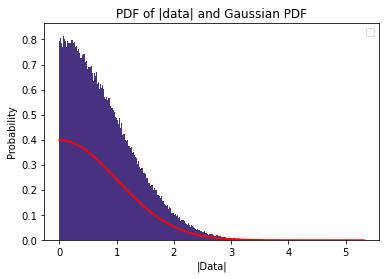

In [48]:
## Load data from the file
import numpy as np
file_name = 'bruit_seul.txt'
data = np.loadtxt(file_name)




# Calculate PDF of |bruit|
_, x, _ = plt.hist(abs(data), bins=1000, density=True)

# Calculate PDF of Gaussian distribution
gaussian_pdf = (1 / (std_deviation * np.sqrt(2 * np.pi))) * np.exp(-((x - mean_value) ** 2) / (2 * std_deviation**2))

plt.plot(x,gaussian_pdf, linewidth=2, color='r' )

# Add labels and title
plt.title('PDF of |data| and Gaussian PDF')
plt.xlabel('|Data|')
plt.ylabel('Probability')
plt.legend()

# # Show the plot
plt.show()



In [49]:
print(x)

[1.70594568e-06 5.31762994e-03 1.06335539e-02 ... 5.30529385e+00
 5.31060977e+00 5.31592570e+00]


### c - 2 - Expliquez la différence entre les deux courbes.

    PDF of ∣dta∣:
        This curve represents the Probability Density Function (PDF) of the absolute values of the variables in tha data. In other words, it gives the relative probability of each amplitude (absolute value) in the distribution.
        It is calculated based on the absolute values of the dataset.

    Gaussian PDF with mean and standard deviation:
        This curve represents the PDF of a Gaussian (normal) distribution with the same mean (μ) and standard deviation (σ) as my original data.
        It models the theoretical distribution based on the previously calculated mean and standard deviation.

The main difference can be observed in the shapes of the curves. The Gaussian distribution curve is a symmetric bell-shaped curve characteristic of a normal distribution. The ∣data∣ curve may have a different shape depending on the actual distribution of my original data.

By examining both curves, i can gain insights into the distribution of my data and see how it compares to an ideal Gaussian distribution with the same mean and standard deviation. Significant divergences may indicate specific characteristics of my dataset.


## A.5 - Evaluer la probabilité des amplitudes du bruit pour différentes plages d'amplitudes

Ici comme très souvent on différencie le bruit du son. Le bruit est une fluctuation statistique, alors que le son est porteur d'information.

On va considérer dans la suite de cette itération que le bruit est parfaitement caractérisé par une loi demi-normale, de moyenne $\mu =0$ et d'écart type $\sigma = 1 $. Sa fonction de densité (PDF) est :
$$ f(x) = \frac{2}{\sigma \sqrt{2 \pi}} \mathrm{e}^{- \frac{1}{2} \left( \frac{ (x - \mu)^2}{\sigma^2} \right)  }$$

On utilisera donc pour répondre aux questions suivantes (A.5) les CDF et PDF analytiques (c'est à dire théoriques) puisque l'on fait l'hypothèse que notre bruit est régi par une distribution demi-normale.

Vous pouvez explorer la doc de scipy.stats pour trouver les fonctions associées à diverses distributions : https://docs.scipy.org/doc/scipy/tutorial/stats.html

### a -  Donner la formule analytique de la fonction de répartition (CDF) de la loi demi-normale
(Pour les plus matheux elle peut se déduire de la PDF, sinon wikipedia est votre ami).

The cumulative distribution function (CDF) of the half-normal distribution with mean μ=0 and standard deviation σ=1 is given by:


$$ F(x) = \frac{1}{2} \left[1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right] $$






where erferf is the error function. The error function is a standard mathematical function that is often implemented in scientific computing libraries

In [50]:
from scipy.stats import norm
from scipy.stats import halfnorm



### b - 1 Probabilités sur les amplitudes du bruit

* Quelle est la probabilité d'observer des amplitudes comprises dans $[0 , \sigma]$  ?
* Même question pour $[0 , 2\sigma]$
* Même question pour $[0, 3\sigma]$


    Probability in the range [0,σ]:
    P(0≤X≤σ)=F(σ)

    Probability in the range [0,2σ]:
    P(0≤X≤2σ)=F(2σ)

    Probability in the range [0,3σ]:
    P(0≤X≤3σ)=F(3σ)
    
    

In [51]:
# Calculate CDF for the specified ranges
cdf_range_1 = halfnorm.cdf(std_deviation )
cdf_range_2 = halfnorm.cdf(2 * std_deviation )
cdf_range_3 = halfnorm.cdf(3 * std_deviation )

print(f"Probability in the range [0, {std_deviation}]: {cdf_range_1:.4f}")
print(f"Probability in the range [0, {2 * std_deviation}]: {cdf_range_2:.4f}")
print(f"Probability in the range [0, {3 * std_deviation}]: {cdf_range_3:.4f}")

Probability in the range [0, 0.9998988458819614]: 0.6826
Probability in the range [0, 1.9997976917639229]: 0.9545
Probability in the range [0, 2.9996965376458844]: 0.9973


### b - 2 Probabilités sur les amplitudes du bruit

À l'inverse on s'intéresse maintenant aux amplitudes comprises dans l'intervalle  $[a,\infty]$ (avec $a > 0$).

Déterminer les valeur de a pour que la probabilité de d'observer une amplitude supérieure à $a$ (donc comprise dans $[a,\infty]$) soit de :

- 5 %
- 1%
- 0.1%


In [52]:
percentage_5 = 5
a_5 = halfnorm.ppf(1 - percentage_5 / 100)
print(f"For {percentage_5}% probability, a is approximately {a_5:.4f}")

For 5% probability, a is approximately 1.9600


In [53]:
percentage_1 = 1
a_1 = halfnorm.ppf(1 - percentage_1 / 100)
print(f"For {percentage_1}% probability, a is approximately {a_1:.4f}")

For 1% probability, a is approximately 2.5758


In [54]:
percentage_0_1 = 0.1
a_0_1 = halfnorm.ppf(1 - percentage_0_1 / 100)
print(f"For {percentage_0_1}% probability, a is approximately {a_0_1:.4f}")


For 0.1% probability, a is approximately 3.2905


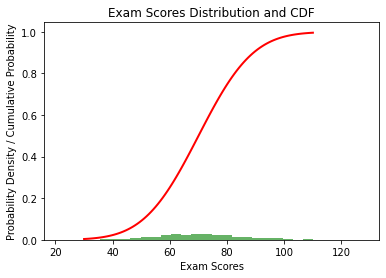

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generate a sample of exam scores assumed to be normally distributed
np.random.seed(42)  # for reproducibility
exam_scores = np.random.normal(loc=70, scale=15, size=1000)

# Plot the histogram of the exam scores
plt.hist(exam_scores, bins=30, density=True, alpha=0.6, color='g')

# Plot the cumulative distribution function (CDF) of the normal distribution
x = np.linspace(30, 110, 100)
plt.plot(x, norm.cdf(x, loc=70, scale=15), 'r-', lw=2)

plt.title('Exam Scores Distribution and CDF')
plt.xlabel('Exam Scores')
plt.ylabel('Probability Density / Cumulative Probability')
plt.show()


# B - Etude d'un son

Vous avez réalisé un enregistrement pendant la nuit. En inspectant rapidement la courbe amplitude(temps), il vous semble voir quelque chose de particulier, et vous soupçonnez fortement qu'il ne s'agisse pas du bruit mais d'un son (une tentative d'effraction ?). Vous trouverez l'extrait en question dans le fichier "son.wav".

## B.0 -  Ecoutez l'extrait

Bon c'est effectivement un son, mais rien d'alarmant. Mais il n'empêche que vous aimerez pouvoir détecter les sons sans avoir à regarder le signal tous les matins.

## B.1 -  Importez le fichier "son.txt" dans un array numpy et faites un plot comparant un zone exclusivement bruitée et une zone de son

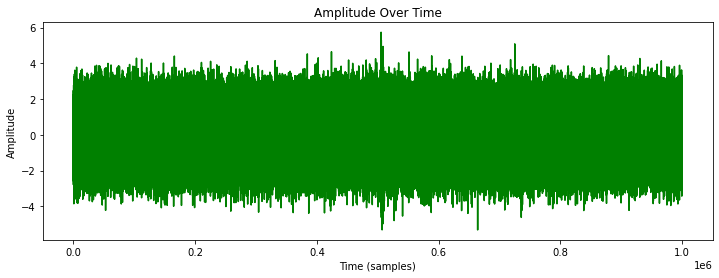

In [55]:
# Load the data from "son.txt" into a NumPy array
file_path = "son.txt"
son_data = np.loadtxt(file_path)
# Plot the entire data
plt.figure(figsize=(12, 4))
plt.plot(son_data, color='green')
plt.title('Amplitude Over Time')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()


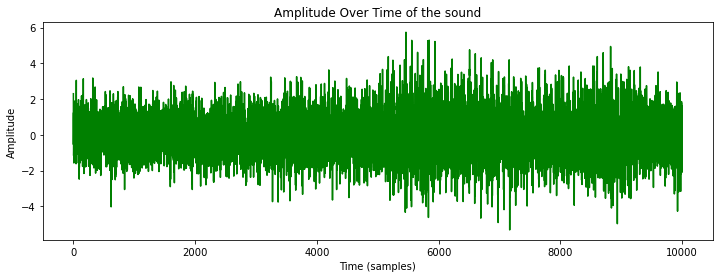

In [56]:
data_interval = son_data[500000: 510000]

#Plot the entire data
plt.figure(figsize=(12, 4))
plt.plot(data_interval, color='green')
plt.title('Amplitude Over Time of the sound')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

## B.2 -  Identifier approximativement la zone de son et afficher la PDF et la CDF empiriques de l'amplitude (en va), quelle différence avec celles du bruit ?

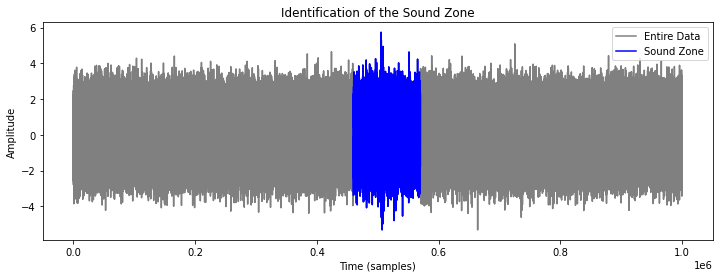

In [57]:

# Define the sound zone 
sound_zone_start = 460000
sound_zone_end = 570000
sound_zone = son_data[sound_zone_start:sound_zone_end]

#Define the noise zone

noise_zone_before = son_data[:sound_zone_start]
noise_zon_after = son_data[sound_zone_end:]

#Plot the sound and noise zones

plt.figure(figsize=(12,4))
plt.plot(son_data, color='gray', label='Entire Data')
plt.plot(range(sound_zone_start, sound_zone_end), sound_zone, color='blue', label='Sound Zone')
plt.title('Identification of the Sound Zone')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


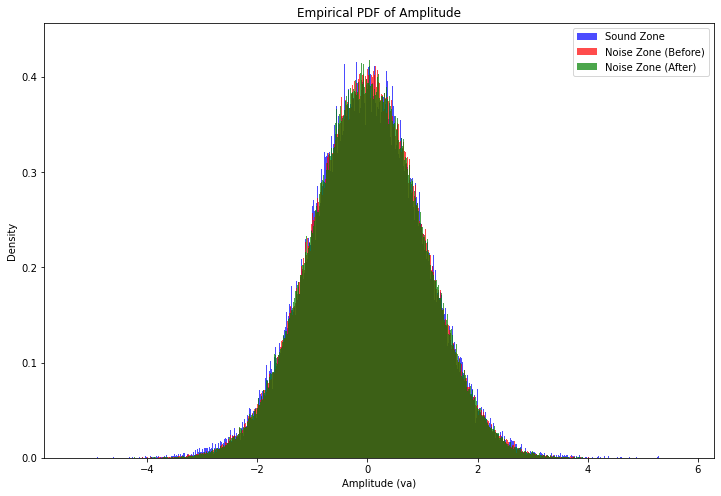

In [58]:

#Plot Empirical PDF and CDF:
# Create a separate figure for PDF and CDF
plt.figure(figsize=(12, 8))

# Plot PDF for the sound zone
plt.hist(sound_zone, bins=1000, density=True, alpha=0.7, color='blue', label='Sound Zone')

# Plot PDF for the noise zones
plt.hist(noise_zone_before, bins=1000, density=True, alpha=0.7, color='red', label='Noise Zone (Before)')
plt.hist(noise_zon_after, bins=1000, density=True, alpha=0.7, color='green', label='Noise Zone (After)')

# Set titles and labels for PDF
plt.title('Empirical PDF of Amplitude')
plt.xlabel('Amplitude (va)')
plt.ylabel('Density')

# Display the legend for PDF
plt.legend()

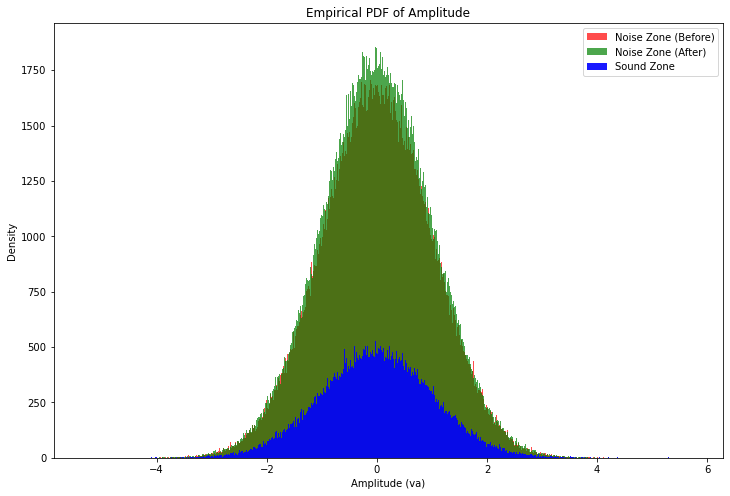

In [59]:
#Plot Empirical PDF and CDF: (no nirmolazaition)
# Create a separate figure for PDF and CDF
plt.figure(figsize=(12, 8))

# Plot PDF for the noise zones
plt.hist(noise_zone_before, bins=1000, alpha=0.7, color='red', label='Noise Zone (Before)')
plt.hist(noise_zon_after, bins=1000, alpha=0.7, color='green', label='Noise Zone (After)')

# Plot PDF for the sound zone
plt.hist(sound_zone, bins=1000, alpha=0.9, color='blue', label='Sound Zone')

# Set titles and labels for PDF
plt.title('Empirical PDF of Amplitude')
plt.xlabel('Amplitude (va)')
plt.ylabel('Density')

# Display the legend for PDF
plt.legend()

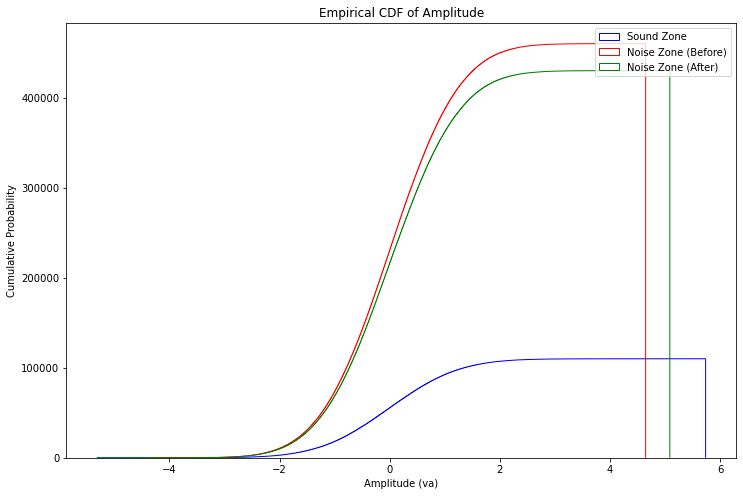

In [60]:
# Create a separate figure for CDF (no nirmolazaition)
plt.figure(figsize=(12, 8))

# Plot CDF for the sound zone
plt.hist(sound_zone, bins=1000, cumulative=True, histtype='step', color='blue', label='Sound Zone')

# Plot CDF for the noise zones
plt.hist(noise_zone_before, bins=1000, cumulative=True, histtype='step', color='red', label='Noise Zone (Before)')
plt.hist(noise_zon_after, bins=1000, cumulative=True, histtype='step', color='green', label='Noise Zone (After)')

# Set titles and labels for CDF
plt.title('Empirical CDF of Amplitude')
plt.xlabel('Amplitude (va)')
plt.ylabel('Cumulative Probability')

# Display the legend for CDF
plt.legend()

# Show the plots
plt.show()

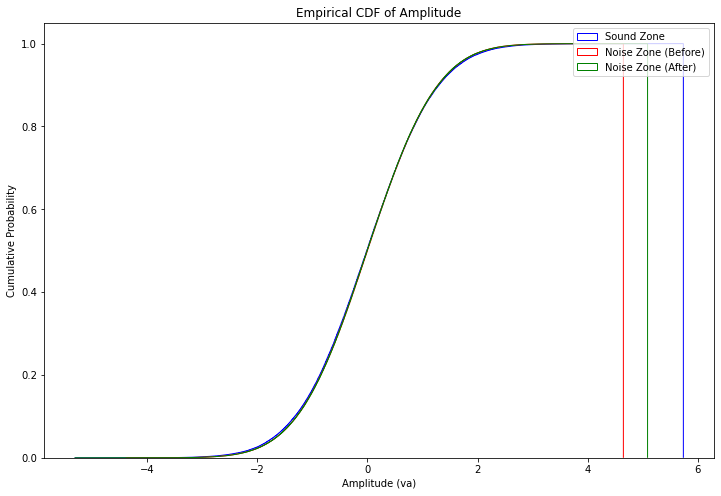

In [61]:
# Create a separate figure for CDF
plt.figure(figsize=(12, 8))

# Plot CDF for the sound zone
plt.hist(sound_zone, bins=1000, density=True, cumulative=True, histtype='step', color='blue', label='Sound Zone')

# Plot CDF for the noise zones
plt.hist(noise_zone_before, bins=1000, density=True, cumulative=True, histtype='step', color='red', label='Noise Zone (Before)')
plt.hist(noise_zon_after, bins=1000, density=True, cumulative=True, histtype='step', color='green', label='Noise Zone (After)')

# Set titles and labels for CDF
plt.title('Empirical CDF of Amplitude')
plt.xlabel('Amplitude (va)')
plt.ylabel('Cumulative Probability')

# Display the legend for CDF
plt.legend()

# Show the plots
plt.show()

## B.3 - Afficher pour différents seuils d’amplitude (en va) les index où l’amplitude est supérieure à ce seuil (en plottant avec deux couleurs différentes par exemple). 

Conclure sur la possibilité d'identifier l'intervalle du son avec cette méthode.

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


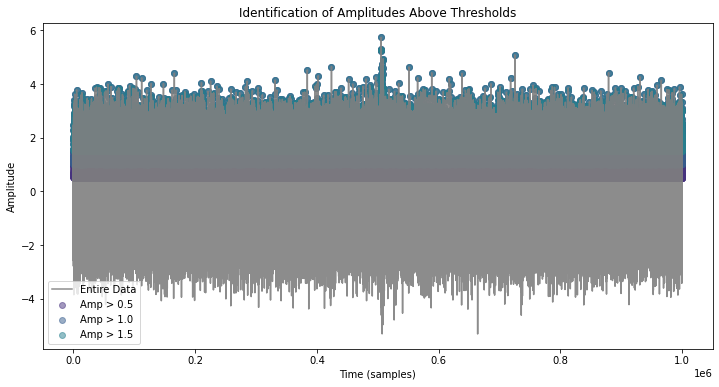

In [62]:

# Define amplitude thresholds
thresholds = [0.5, 1.0, 1.5]  # Adjust these thresholds as needed

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the entire amplitude curve in gray
ax.plot(son_data, color='gray',alpha=0.9, label='Entire Data')

# Iterate over each threshold and plot indexes exceeding the threshold with different colors
for threshold in thresholds:
    indices_above_threshold = np.where(son_data > threshold)[0]
    ax.scatter(indices_above_threshold, son_data[indices_above_threshold], label=f'Amp > {threshold}', alpha=0.5)

# Set titles and labels
ax.set_title('Identification of Amplitudes Above Thresholds')
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Amplitude')

# Display legend
ax.legend()

# Show the plot
plt.show()

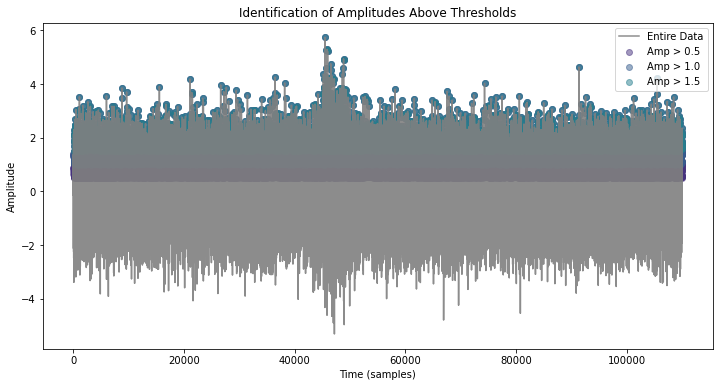

In [63]:

# Define amplitude thresholds
thresholds = [0.5, 1.0, 1.5]  # Adjust these thresholds as needed

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the entire amplitude curve of sound_zone in gray
ax.plot(sound_zone, color='gray',alpha=0.9, label='Entire Data')

# Iterate over each threshold and plot indexes exceeding the threshold with different colors
for threshold in thresholds:
    indices_above_threshold = np.where(sound_zone > threshold)[0]
    ax.scatter(indices_above_threshold, sound_zone[indices_above_threshold], label=f'Amp > {threshold}', alpha=0.5)

# Set titles and labels
ax.set_title('Identification of Amplitudes Above Thresholds')
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Amplitude')

# Display legend
ax.legend()

# Show the plot
plt.show()

# Itération 2 - Test d'hypothèse

Plutôt que de faire des tests sur les occurences ponctuelles d'amplitude supérieure à une valeur seuil, vous décidez de faire une étude similaire portant sur le nombre d'occurences durant un certain temps. De cette manière, si le bruit atteint ponctuellement une amplitude importante, on peut se douter qu'il a très peu de chance de réitérer cet "exploit" beaucoup de fois dans un intervalle de temps court. Tout l'enjeu sera de quantifier cette "chance" (ie cette probabilité).

# A - Un peu de proba


* On note une limite d'amplitude $a_l$. La probabilité d'obtenir sur une unique mesure (on peut dire tirage comme pour les jeux de hasard) une amplitude $a$, telle que $a \geq a_l $ est notée $p$.
* On note $n$, le nombre d'amplitudes mesurées sur un intervalle (échantillon).
* On note $k$ un entier positif inférieur ou égal à $n$. 



## A.1 - Donnez la formule de $P_k^{n}$, la probabilité de  tirer $k$ fois une amplitude supérieure ou égale à $a_l$ lors de $n$ tirages.

Les plus affamés d'entre vous peuvent la démontrer. Sinon une recherche sur internet suffira largement.
The formula for the binomial PMF is given by:

P(X=k)=(nk)⋅pk⋅(1−p)n−k

Here:

    X is the random variable representing the number of successes.
    n is the number of trials.
    k is the number of successes.
    p is the probability of success on a single trial.

In the context of the question:

    Let X be the random variable representing the number of amplitudes greater than or equal to al​.
    Let n be the total number of amplitudes measured.
    Let k be the number of times an amplitude greater than or equal to al​ is drawn.

So, the probability Pkn​, which represents the probability of drawing k times an amplitude greater than or equal to al​ in n draws, is given by the binomial distribution:

Pkn=(nk)⋅pk⋅(1−p)n−k

Where p is the probability of obtaining an amplitude greater than or equal to al​ on a single measurement.



## A.2 - Trouvez dans un package python existant une fonction  qui permet de calculer cette probabilité $P_k^n$

Dans Python, vous pouvez utiliser la fonction scipy.stats.binom.pmf pour calculer la probabilité d'une distribution binomiale. Cette fonction est incluse dans le module scipy.stats. 



## A.3 - Soit $n =20 $ :

### a - Pour plusieurs valeurs de $p$, calculez $P_k^{n}$ pour chaque $k=1..n$

Vérifiez bien que la somme des probabilités sur toutes les valeurs de $k$ pour chaque loi vaut 1

In [64]:
from scipy.stats import binom

# Définissez les paramètres de la distribution binomiale
n = 20  # Nombre total de tirages
p = 0.5  # Probabilité de succès dans un tirage

# Définissez k, le nombre de succès que vous voulez
k = 10

# Calculez la probabilité P_k^n
probability = binom.pmf(k, n, p)

# Imprimez le résultat
print(f"La probabilité P_{k}^{n} est : {probability}")

La probabilité P_10^20 est : 0.17619705200195296


In [76]:
# Set the total number of trials
n = 20

# Set different values of p
probabilities_p = [0.2, 0.5, 0.8]

# Iterate over the values of p
for p in probabilities_p:
    print(f"\nBinomial distribution for p = {p}")

    # Initialize the sum of probabilities for verification
    total_probability = 0

    # Iterate over the values of k from 1 to n
    for k in range(1, n + 1):
        # Calculate the probability P_k^n
        probability = binom.pmf(k, n, p)

        # Print the probability for each k
        print(f"P_{k}^{n} : {probability}")

        # Add the probability to the total sum
        total_probability += probability

    # Verify that the sum of probabilities is equal to 1
    print(f"Sum of probabilities: {total_probability}")


Binomial distribution for p = 0.2
P_1^20 : 0.05764607523034237
P_2^20 : 0.13690942867206338
P_3^20 : 0.20536414300809466
P_4^20 : 0.2181994019461005
P_5^20 : 0.17455952155688056
P_6^20 : 0.1090997009730505
P_7^20 : 0.0545498504865252
P_8^20 : 0.022160876760150855
P_9^20 : 0.007386958920050288
P_10^20 : 0.0020314137030138283
P_11^20 : 0.000461684932503143
P_12^20 : 8.65659248443393e-05
P_13^20 : 1.3317834591436816e-05
P_14^20 : 1.6647293239296027e-06
P_15^20 : 1.6647293239296013e-07
P_16^20 : 1.3005697843200012e-08
P_17^20 : 7.650410496000016e-10
P_18^20 : 3.1876710400000057e-11
P_19^20 : 8.388608000000003e-13
P_20^20 : 1.0485760000000012e-14
Sum of probabilities: 0.9884707849539323

Binomial distribution for p = 0.5
P_1^20 : 1.9073486328124993e-05
P_2^20 : 0.00018119812011718736
P_3^20 : 0.0010871887207031228
P_4^20 : 0.004620552062988283
P_5^20 : 0.014785766601562497
P_6^20 : 0.03696441650390628
P_7^20 : 0.07392883300781249
P_8^20 : 0.1201343536376954
P_9^20 : 0.1601791381835938
P_10

###  b - Affichez en une sur un plot en barre

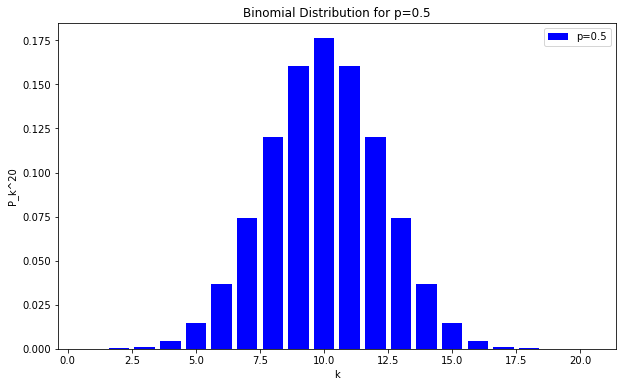

In [73]:
# Set the total number of trials
n = 20

# Set the desired value of p
p = 0.5

# Initialize a list to store probabilities
probabilities = []

# Iterate over the values of k from 1 to n
for k in range(1, n + 1):
    # Calculate the probability P_k^n
    probability = binom.pmf(k, n, p)
    probabilities.append(probability)

# Plot the probabilities on a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, n + 1), probabilities, width=0.8, color='blue', label=f'p={p}')

# Add labels and legend
plt.xlabel('k')
plt.ylabel(f'P_k^{n}')
plt.title('Binomial Distribution for p=0.5')
plt.legend()

# Show the plot
plt.show()

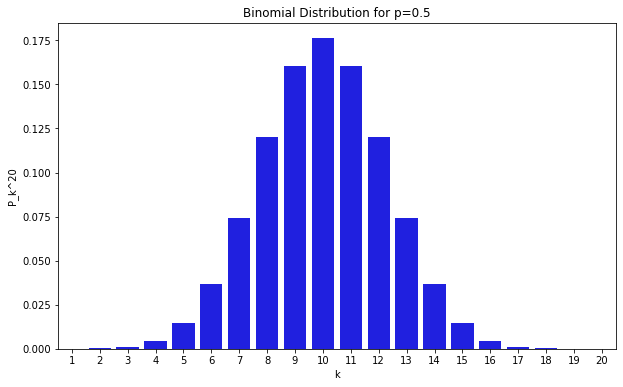

In [67]:
import seaborn as sns
# Set the total number of trials
n = 20

# Set the desired value of p
p = 0.5

# Initialize a list to store probabilities
probabilities = []

# Iterate over the values of k from 1 to n
for k in range(1, n + 1):
    # Calculate the probability P_k^n
    probability = binom.pmf(k, n, p)
    probabilities.append(probability)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=range(1, n + 1), y=probabilities, color='blue')
plt.xlabel('k')
plt.ylabel(f'P_k^{n}')
plt.title('Binomial Distribution for p=0.5')

# Show the plot
plt.show()

## trying with seaborn 

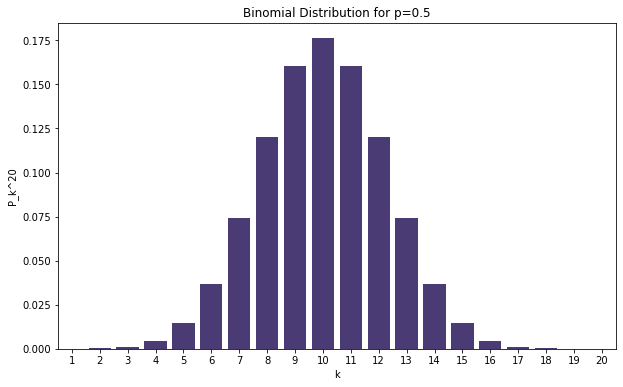

In [74]:
# Set the total number of trials
n = 20

# Set the desired value of p
p = 0.5

# Initialize a list to store probabilities
probabilities = []

# Iterate over the values of k from 1 to n
for k in range(1, n + 1):
    # Calculate the probability P_k^n
    probability = binom.pmf(k, n, p)
    probabilities.append(probability)

# Choose a Seaborn color palette (e.g., "viridis")
sns.set_palette("viridis")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=range(1, n + 1), y=probabilities)
plt.xlabel('k')
plt.ylabel(f'P_k^{n}')
plt.title('Binomial Distribution for p=0.5')

# Show the plot
plt.show()

### c - Affichez les toutes sur le même graphe
Conseil : pour la visibilité utilisez plutôt plot que bar

Question subsidiaire : quel objet mathématique permet d'unifier le concept de loi de probabilité discrète et celui de densité de probabilité qui s'applique aux variables aléatoire continues (pdf) ?

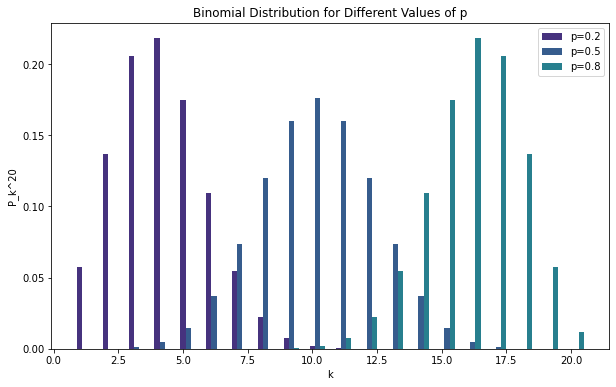

In [69]:
# Set the total number of trials
n = 20

# Set different values of p
probabilities_p = [0.2, 0.5, 0.8]

# Initialize lists to store probabilities for each p
probabilities_lists = []

# Iterate over the values of p
for p in probabilities_p:
    # Initialize the list for probabilities for each p
    probabilities = []

    # Iterate over the values of k from 1 to n
    for k in range(1, n + 1):
        # Calculate the probability P_k^n
        probability = binom.pmf(k, n, p)
        probabilities.append(probability)

    # Store the list of probabilities for the current p
    probabilities_lists.append(probabilities)

# Convert the list of lists to a NumPy array for easier plotting
probabilities_array = np.array(probabilities_lists)

# Plot the probabilities on a bar plot
plt.figure(figsize=(10, 6))
for i, p in enumerate(probabilities_p):
    # Convert the range to a list before adding the float value
    x_values = list(range(1, n + 1))
    plt.bar(np.array(x_values) + i * 0.2, probabilities_array[i], width=0.2, label=f'p={p}')

# Add labels and legend
plt.xlabel('k')
plt.ylabel(f'P_k^{n}')
plt.title('Binomial Distribution for Different Values of p')
plt.legend()

# Show the plot
plt.show()

# B - Construction du test d'hypothèse

Vous voulez donc construire votre test d'hypothèse. On s'appuiera pour ce test sur la loi binomiale étudiée partie A. Pour cela, vous avez besoin de définir une hypothèse nulle, une hypothèse alternative, ainsi qu'un critère de significativité.

* Il faudra identifier l'amplitude $a_l$ correspondant à une probabilité $p$. Cette probabilité correspond à la probabilité, sur une seule mesure du bruit, d'obtenir une amplitude supérieure ou égale à $a_l$. Donc vous devrez décider d'abord de la valeur de $p$ pour en déduire $a_l$ (si vous êtes confus, revoyez la partie 4-b de l'itération 1).
* Vous aurez besoin de choisir un $n$. Vous comptabiliserez pour un intervalle comprenant $n$ mesures, le nombre $N_a$ de fois que vous aurez obtenu une mesure $a \geq a_l$.

Mais d'abord :

## B.1 - Questions théoriques (sans code)
# Objective:
# Determine if there is a significant difference in amplitude between the noise and sound

### a - Caractérisez l'hypothèse nulle de votre test $H_{0} $

#### The amplitude of the noise is equal to or greater than the amplitude of the sound. 
#### H0:μ noise ≥ μ sound​, where μ noise is the mean amplitude of the noise, and μ sound​ is the mean amplitude of the sound.


### b - Caractérisez l'hypothèse alternative $H_1$ (ou $H_a$ selon les gouts)
#### The amplitude of the sound is significantly greater than the amplitude of the noise. 
#### H1:μ noise<μ sound. 



### c - Identifier l'élément mesurable (i.e. la statistique) qui permettra de réaliser le test
#### The measurable element (statistic) that will be used to perform the t-test is the difference in means between the amplitudes of the noise and the sound. In other  words, the test statistic is the sample mean difference (xˉnoise−xˉsoundxˉnoise​−xˉsound​), where xˉnoisexˉnoise​ is the mean amplitude of the noise, and xˉsoundxˉsound​ is the mean amplitude of the sound.

#### The t-test will evaluate whether this observed mean difference is statistically significant or if it could have occurred by random chance, assuming the null hypothesis that the mean amplitude of the noise is greater than or equal to the mean amplitude of the sound.

### d - Rappeler la loi de probabilité de cet élément mesurable (ie cette statistique "sous" $H_0$)
#### Under the null hypothesis (H0:μ noise ≥ μ sound ​), the probability law of the test statistic (difference in means) follows a t-distribution with degrees of freedom determined by the sample sizes of the two groups.

#### Mathematically, if T represents the t-statistic, and n noise ​ and n sound are the sample sizes of the noise and sound groups, respectively, then the probability density function (PDF) of T under H0​ is given by:

#### f(t)=Γ(n noise+n sound−22)π(n noise+n sound−2)Γ(n noise−12)Γ(n sound−12)(1+t2n noise+n sound−2)−n noise+n sound−2

#### Here, Γ denotes the gamma function.

#### This distribution accounts for the variability in the sample means and sizes of the two groups and is used to calculate the p-value for the t-test.

### e -  Définir la p-value d'un test (donner la formule), et la valeur qu'elle prend pour ce test en particulier
#### The p-value in a hypothesis test is the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming the null hypothesis (H0​) is true.

#### For a t-test, the p-value is typically calculated based on the t-distribution. The formula for a one-tailed test (like in my case where the alternative hypothesis is 
#### H1:μ noise<μ sound​) is given by:

#### p-value=P(T≤tobserved)
#### Here, T is the t-statistic calculated from the sample data, and tobservedtobserved​ is the observed value of the t-statistic.

#### In Python, when using the ttest_ind function from scipy.stats, the p-value is automatically calculated and provided in the output
### f - Étant donné le seuil de significativité $\alpha$, identifier dans quelles situations $H_0$ sera rejetée, ou bien  non rejetée.
 #### Given the significance threshold α, the decision to reject or not reject the null hypothesis (H0​) is based on the comparison of the p-value obtained from the hypothesis test.

#### Here are the general guidelines:

#### Reject H0​:
#### If the p-value is less than or equal to α.
#### This suggests that the observed data provides enough evidence to conclude that the null hypothesis is unlikely to be true.

#### Do Not Reject H0​:
#### If the p-value is greater than α.
#### This suggests that there is not enough evidence to conclude that the null hypothesis is false.

#### Specifically for the t-test with the alternative hypothesis H1:μ noise<μ sound​:
#### If the p-value is less than or equal to α, you would reject H0​.
#### If the p-value is greater than α, you would not reject H0​.

#### rejecting H0 would indicate that there is sufficient evidence to suggest that the amplitude of the sound is significantly greater than the amplitude of the noise. Not rejecting H0​ would imply that there is not enough evidence to make such a claim.

## B.2 Réaliser un test d'hypothèse :

Comme énoncé au début de cette partie B, il faut choisir une valeur pour $p$ et pour $n$. On se fixera $n = 100$, et $p = 0.01$. On se donnera également $\alpha = 0.05 $.

On commencera d'abord par travailler sur un intervalle de 100 mesures au milieu du signal sonore, entre les indices : $[505400, 505500]$.

### B.2.a - Plotter la PMF loi de probabilité de l'élément mesurable "sous" $H_0$

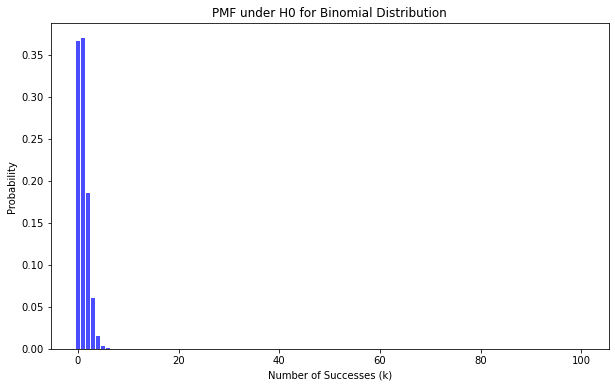

In [103]:
# Set the parameters
n = 100  # Number of measurements
p = 0.01  # Probability under H0

# Define the interval
data_interval_for_null_hypothese = son_data[505400:505500]


# Generate the x values (number of successes, k)
x_values = np.arange(0, n + 1)

# Calculate the PMF under H0
pmf_h0 = binom.pmf(x_values, n, p)

# Plot the PMF
plt.figure(figsize=(10, 6))
plt.bar(x_values, pmf_h0, width=0.8, color='blue', alpha=0.7)
plt.title('PMF under H0 for Binomial Distribution')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.show()

In [119]:
binom.pmf(n_above, 100, p = 0.01) < alpha

True

### B.2.b - Calculer la valeur de l'élément mesurable d'après $p$

In [81]:
percentage_of_probabilité  = 1
a_1 = halfnorm.ppf(1 - percentage_of_probabilité / 100)
print(f"For {percentage_of_probabilité}% probability, a is approximately {a_1:.4f}")

For 1% probability, a is approximately 2.5758


In [139]:
mask_thresh = np.abs(data_interval_for_null_hypothese) >= a_1
n_above = mask_thresh.sum()

### B.2.c - Calculez la p-value de votre test. A quoi correspond-elle ?


In [140]:
import scipy
p_value = scipy.stats.binomtest(n_above, 100, p = 0.01).pvalue
p_value < alpha

True

In [82]:
from scipy.stats import binom

# Set the parameters
n = 100  # Number of measurements
p = 0.01  # Probability under H0

# Observed number of successes (number of successes, k)
observed_successes = np.arange(0, n + 1)

# Calculate the p-value
p_value = 1 - binom.cdf(observed_successes - 1, n, p)

# Print the p-value
print(f"P-value: {p_value}")


P-value: [1.00000000e+00 6.33967659e-01 2.64238021e-01 7.93732023e-02
 1.83740364e-02 3.43232159e-03 5.34534464e-04 7.10836614e-05
 8.22020474e-06 8.38510967e-07 7.63158753e-08 6.25551844e-09
 4.65406269e-10 3.16352500e-11 1.97564187e-12 1.13908882e-13
 6.10622664e-15 3.33066907e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00

### B.2.d -  Prendre la décision (rejet ou non) concernant l'hypothèse posée


In [85]:
# Making a decision regarding the null hypothesis typically involves comparing the p-value to the chosen significance level (α). 
# The significance level is the acceptable probability of observing a test statistic as extreme as or more extreme than the one observed, 
# assuming the null hypothesis is true. 
# A common choice for α is 0.05.

### B.2.e - Le test que vous venez de construire s'appelle en réalité un test binomial. Trouvez une librairie qui l'implémente et comparez avec votre p-value.


In [ ]:
# from scipy.stats import binom_test

### B.2.f - Réaliser ce même test pour tout l'enregistrement pour chaque intervalle de 100 mesures et retracer le signal avec une couleur différente pour les intervalles pour lesquels l'hypothèse $H_0$ a été rejetée. Ré-essayer avec $\alpha = 0.000001$.


In [132]:
number_sliced = int(len(son_data)/100)
p_value_l = []
for arr in np.array_split(son_data, number_sliced):
    mask_thresh = np.abs(arr) >= a_1
    n_above = mask_thresh.sum()
    p_value_l.append(scipy.stats.binomtest(n_above, len(arr), p = p).pvalue)

In [134]:
len(p_value_l)

10000

In [138]:
(np.array(p_value_l) < alpha).sum()

18

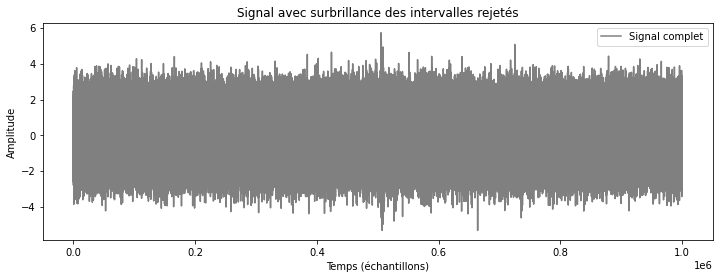

In [89]:
from scipy.stats import binom_test

# Paramètres du test
n = 100  # Nombre de mesures par intervalle
p = 0.01  # Probabilité sous H0
alpha = 0.000001  # Seuil de signification

# Créer un tableau pour stocker les résultats du test pour chaque intervalle
rejected_intervals = []

# Parcourir les intervalles de 100 mesures
for i in range(0, len(son_data) - n, n):
    # Extraire l'intervalle de données
    interval_data = son_data[i:i + n]

    # Compter le nombre de succès dans l'intervalle (à adapter en fonction de votre critère de succès)
    observed_successes = np.sum(interval_data > a_1)  # Remplacez 'threshold' par votre critère de succès

    # Effectuer le test binomial
    p_value = binom_test(observed_successes, n, p)

    # Vérifier si l'hypothèse H0 est rejetée
    if p_value < alpha:
        rejected_intervals.append((i, i + n))

# Tracer le signal avec des couleurs différentes pour les intervalles rejetés
plt.figure(figsize=(12, 4))
plt.plot(son_data, color='gray', label='Signal complet')

# Mettre en surbrillance les intervalles rejetés en rouge
for interval in rejected_intervals:
    plt.axvspan(interval[0], interval[1], color='red', alpha=0.3)

plt.title('Signal avec surbrillance des intervalles rejetés')
plt.xlabel('Temps (échantillons)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [90]:
rejected_intervals

[]

### B.2.g - Estimer la proportion de faux positifs avec $\alpha = 0.05$ . Est-ce la valeur attendue, et pourquoi ?

When you use a significance level of $\alpha = 0.05$, it means you are willing to accept up to 5% false positives (Type I errors). In other words, you are accepting a 5% risk of incorrectly rejecting the null hypothesis.

The proportion of false positives is often equivalent to the significance level $\alpha$. So, with $\alpha = 0.05$, you expect to have a proportion of false positives of around 5%.

If you find that the proportion of false positives is significantly higher than expected, it could indicate an issue with the test or unexpected conditions in the data. That's why it's important to understand the expected proportion of false positives and assess whether the observed results are consistent with this expectation.

### B.2.f - Extraire le son détecté et l'enregistrer dans un fichier .wav

Avec $n=100$, on se rend compte qu'il y a certains intervalles au milieu du son ou l'hypothèse nulle n'est pas rejetée (des faux négatifs donc). Plottez ces intervalles.

Avec un $n$ trop petit, on se retrouve avec le même problème que par la méthode du seuillage (B.3 itération 1) : on a soit trop de faux négatifs, soit trop de faux positifs. En effet comme $n=100$ représente $1/480$ème de seconde (puisque l'échantillonnage est de 48000Hz), il est tout à fait possible d'avoir des intervalles avec 100 amplitudes faibles au milieu d'un son.

Refaire le test pour des intervalles d'une seconde ($n = 48000$) avec $\alpha = 0.05$, replotter le résultat, et enregistrer l'intervalle de son détecté dans un fichier wav pour écouter le résultat de votre détection de son par test d'hypothèse. Vous pourrez utiliser la fonction `scipy.io.wavfile.write`.

### B.3 - Regarder la vidéo : https://www.youtube.com/watch?v=jy9b1HSqtSk puis répondre par vrai ou faux à chacune des questions suivantes

#### B.3.a - Pour chaque détection (ie $H_0$ rejetée) j’ai une probabilité 1 - pvalue qu’il s’agisse d’une “vraie détection”
#### B.3.b - En supposant $H_0$ vraie, j’ai une probabilité $\alpha$ de conclure le rejet de $H_0$

# Pour aller plus loin

Il existe de nombreux tests d'hypothèses bien établis pour tout un tas de situations courantes (comparaison de moyennes entre 2 échantilllons, test de correlation de deux échantillons, test de normalité d'un échantillon, ... ) qui sont décrits dans les chapitres II, III et IV du poly sur les tests d'hypothèses. Vous pouvez également regarder cet article qui les résume avec le code python correspondant :

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

ou
https://towardsdatascience.com/demystifying-statistical-analysis-1-a-handy-cheat-sheet-b6229bf992cf

Et les notebook kaggle suivants:

https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing

https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests

https://www.kaggle.com/hamelg/python-for-data-26-anova

Sur l'inférence bayésienne pour remplacer un t-test :
https://www.youtube.com/watch?v=fhw1j1Ru2i0
http://nmouatta.blogspot.com/2016/08/the-bayesian-t-test-in-python_25.html